Import necessary packages.

In [2]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [17]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
e1, e2, es, alpha1, alpha2, alphas, beta, gamma, w, theta1, theta2 = symbols('e_1, e_2, e_{s}, alpha_1, alpha2, alpha_s, beta, gamma, w, theta_1, theta_2', nonzero=True, positive=True)


# 2-player team production setup

### Processors

One processors, player 1, chooses their effort level to maximize their payoff. 

Under individual pay on their own production, the processor faces the problem
\begin{align}
    \max_{e_1} 2w(e_1 \alpha_1)^{\beta} (e_s \alpha_s)^{\gamma} - \frac{1}{2}e_1^2
\end{align}


### Supplier

The supplier chooses effort towards the cooperation with the processor, $e_{s}$, so maximize their own payoff of
\begin{align}
    \max_{e_{s}} &\quad \overbrace{ 2w \left( (e_1 \alpha_1)^{\beta} (e_s \alpha_s)^{\gamma} \right) - \frac{1}{2} e_{s}^2 }^{\text{own private payoff}} \\
        & \qquad \underbrace{ + \theta_1 \left( 2w(e_1 \alpha_1)^{\beta} (e_s \alpha_s)^{\gamma} - \frac{1}{2}e_1^2 \right) }_{\text{social incentives}}
\end{align}

# Analysis

## Solve for the Nash equilibrium of the game

Each player chooses efforts simultaneously and independently, holding beliefs about each others' choices. 

The processor, holding a belief about the supplier's effort $\hat{e}_s$, solves
\begin{align}
    \max_{e_1} 2w(e_1 \alpha_1)^{\beta} (\hat{e}_s \alpha_s)^{\gamma} - \frac{1}{2}e_1^2
\end{align}

The supplier, holding a belief about the processor's effort $\hat{e}_1$, solves
\begin{align}
    \max_{e_{s}} &\quad \overbrace{ 2w \left( (\hat{e}_1 \alpha_1)^{\beta} (e_s \alpha_s)^{\gamma} \right) - \frac{1}{2} e_{s1}^2 }^{\text{own private payoff}} \\
        & \qquad \underbrace{ + \theta_1 \left( 2w(\hat{e}_1 \alpha_1)^{\beta} (e_s \alpha_s)^{\gamma} - \frac{1}{2}\hat{e}_1^2 \right) }_{\text{social incentives}}
\end{align}

### Solve the players' best responses given beliefs about team members' effort levels

Note: we omit the hats here to simplify the notations. 

### Processor's problem

In [19]:
# define payoff function for the processors (equation 10 in appendix)
u1 = 2*w* (e1*alpha1)**beta * (es*alphas)**gamma - 1/2 * e1**2
# check profit function
u1

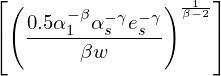

In [20]:
# solve for processors' best response functions (equation 11 in appendix)
e1br_sol = solve(u1.diff(e1), e1)
display(e1br_sol)

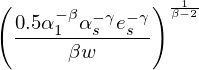

In [21]:
# retrieve the first element of these solutions
e1br = e1br_sol[0].simplify()
e1br

In markdown, we can type up the processors' best response functions
\begin{align}
    e_1 &= \left( 2 w \beta (e_{s} \alpha_s)^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P} 
\end{align}

#### Plot the processor's best responses

In [36]:
# assume some values on exogenous variables for plots
alpha1_value = 0.5
alphas_value = 0.5
beta_value = 0.5
gamma_value = 0.5
w_value = 10
theta1_value = 0.5

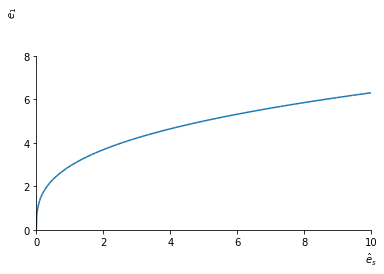

In [33]:
# plot the best response for processor 1
e1plot_fun = e1br.subs([(alpha1,alpha1_value),(alphas,alphas_value),(beta,beta_value),(gamma,gamma_value),(w,w_value)])
e1plot = plot(e1plot_fun, (es,0,10), ylim=[0,10], xlabel="$\hat{e}_{s}$", ylabel="$e_1$")

### Supplier's problem

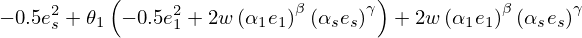

In [22]:
# define payoff function for the supplier
us = 2*w*( (e1*alpha1)**beta * (es*alphas)**gamma ) - 1/2 * (es)**2 + theta1*u1
# check profit function
us

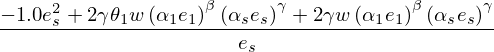

In [24]:
# derive supplier's FOCs 
us.diff(es).simplify()

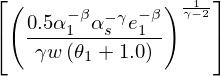

In [26]:
## solve for processors' best response functions (sympy cannot do it)
esbr_sol = solve( us.diff(es), es)
esbr_sol


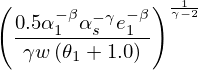

In [28]:
# retrieve the first element of these solutions
esbr = esbr_sol[0].simplify()
esbr

In markdown, we can type up the supplier's best response functions
\begin{align}
    e_s &= \left( (1+\theta_1) 2 w \gamma (e_1 \alpha_1)^{\beta} \alpha_s^{\gamma} \right)^{\frac{1}{2-\gamma}} \tag{P} 
\end{align}

In [31]:
esplot_fun

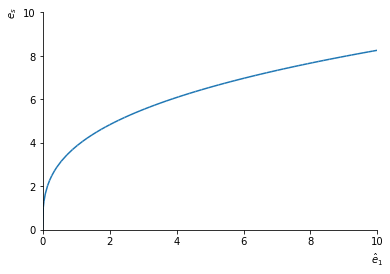

In [37]:
# plot the best response for supplier
esplot_fun = esbr.subs([(alpha1,alpha1_value),(alphas,alphas_value),(beta,beta_value),(gamma,gamma_value),(w,w_value),(theta1,theta1_value)])
esplot = plot(esplot_fun, (e1,0,10), ylim=[0,10], xlabel="$\hat{e}_{1}$", ylabel="$e_s$")


### Nash Equilibrium

The Nash equilibrium of this model is determined by the two first order conditions, where each player chooses their best responses according the correct beliefs about each others' strategies
\begin{align}
    e_1 &= \left( 2 w \beta (e_{s} \alpha_s)^{\gamma} \alpha_1^{\beta} \right)^{\frac{1}{2-\beta}} \tag{P} \\
    e_{s} &= \left( (1+\theta_1) 2 w \gamma (e_1 \alpha_1)^{\beta} \alpha_s^{\gamma} \right)^{\frac{1}{2-\gamma}} \tag{S}
\end{align}

### Solve for equilibrium efforts

In [38]:
# calculate equilibrium efforts
equil_sol = solve( (u1.diff(e1), us.diff(es)) , e1, es)
equil_sol

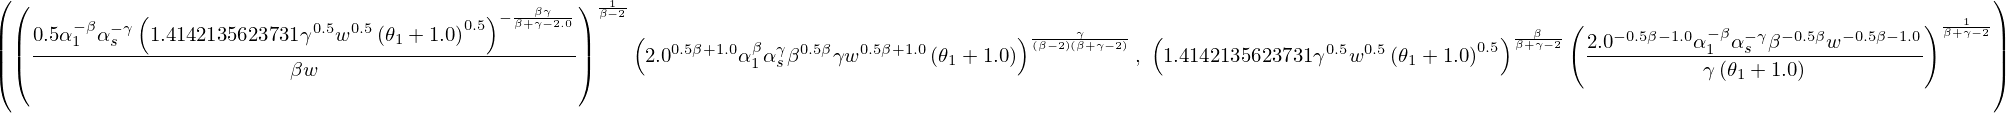

In [41]:
e1_star = equil_sol[0][0].simplify()
es_star = equil_sol[0][1].simplify()
e1_star, es_star

### Equilibrium output level

Plugging the equilibrium effort levels into the production function yields the equilibrium output of the group.

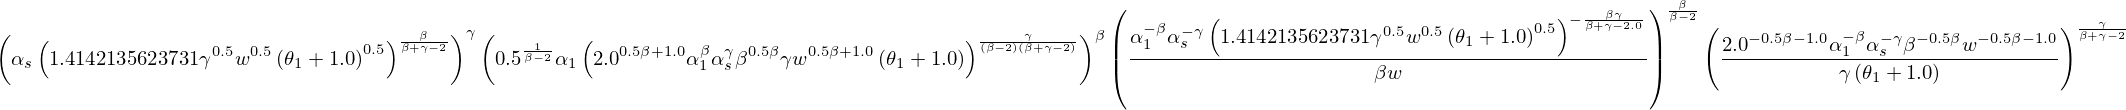

In [43]:
# define production function
output = (e1*alpha1)**beta * (es*alphas)**gamma
# calculate equilibrium output
output_equil = output.subs([(e1, e1_star), (es, es_star)]).simplify()
output_equil

#### Plot equilibrium output as a function of social preferences

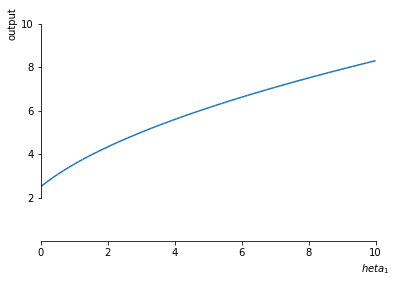

In [46]:
# plot the production function
output_equil_plot_fun = output_equil.subs([(alpha1,alpha1_value),(alphas,alphas_value),(beta,beta_value),(gamma,gamma_value),(w,w_value)])
output_equil_plot = plot(output_equil_plot_fun, (theta1,0,10), ylim=[0,10], xlabel="$\theta_{1}$", ylabel="output")


### Comparative Statics

Q: what comparative statics can you think of analyzing in this model?